<a href="https://colab.research.google.com/github/galileo15640215/kikagaku/blob/master/kikagaku08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

畳み込みニューラルネットワークの実装
https://www.kikagaku.ai/tutorial/basic_of_computer_vision/learn/tensorflow_convolution

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [0]:
# GPU が使用可能であることを確認
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2943357389314323303
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2044746689322304228
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 74362583234732692
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648777152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7278916988404728480
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
# データセットの取得
train, test = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
len(train)

2

In [0]:
# 1 つ目の要素の確認
type(train[0])

numpy.ndarray

In [0]:
train[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
# 1 目の要素の形を確認
train[0].shape

(60000, 28, 28)

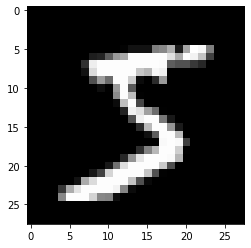

In [0]:
img = train[0][0] # 画像データセットの 1 サンプル目を抽出
plt.imshow(img, cmap='gray');

In [0]:
# 2 つ目の要素の確認
type(train[1])

numpy.ndarray

In [0]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
train[1].shape

(60000,)

In [0]:
x_train = train[0].reshape(60000, 28, 28, 1) / 255
x_test = test[0].reshape(10000, 28, 28, 1) / 255

In [0]:
# チャネルが追加されていることを確認
x_train[0].shape

(28, 28, 1)

In [0]:
# 正規化されていることを確認
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [0]:
t_train = train[1]
t_test = test[1]

In [0]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
t_train, t_test = t_train.astype('int32'), t_test.astype('int32')

In [0]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [0]:
from tensorflow.keras import models,layers

# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
    # 特徴量抽出
    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2)),
    # ベクトル化
    layers.Flatten(),
    # 識別
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 507)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               50800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 51,840
Trainable params: 51,840
Non-trainable params: 0
_________________________________________________________________


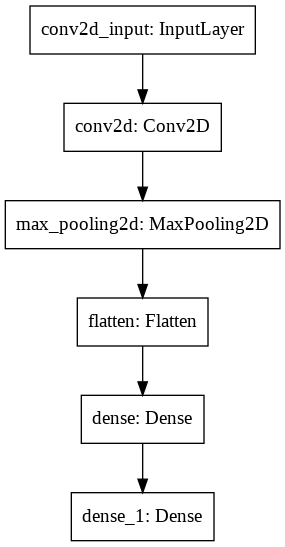

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [0]:
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=0.01)

# モデルのコンパイル
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
# モデルの学習
batch_size = 4096
epochs = 30

# 学習の実行
history = model.fit(x_train, t_train, 
                batch_size=batch_size, 
                epochs=epochs, verbose=1, 
                validation_data=(x_test, t_test))

Epoch 1/30
15/15 [==============================] - 0s 32ms/step - loss: 0.8988 - accuracy: 0.7390 - val_loss: 0.3954 - val_accuracy: 0.8911
Epoch 2/30
15/15 [==============================] - 0s 15ms/step - loss: 0.3349 - accuracy: 0.9030 - val_loss: 0.2814 - val_accuracy: 0.9166
Epoch 3/30
15/15 [==============================] - 0s 15ms/step - loss: 0.2482 - accuracy: 0.9260 - val_loss: 0.2085 - val_accuracy: 0.9362
Epoch 4/30
15/15 [==============================] - 0s 16ms/step - loss: 0.1983 - accuracy: 0.9413 - val_loss: 0.1793 - val_accuracy: 0.9431
Epoch 5/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1636 - accuracy: 0.9510 - val_loss: 0.1538 - val_accuracy: 0.9532
Epoch 6/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1396 - accuracy: 0.9578 - val_loss: 0.1283 - val_accuracy: 0.9610
Epoch 7/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1211 - accuracy: 0.9635 - val_loss: 0.1179 - val_accuracy: 0.9649
Epoch 8/30
15

In [0]:
!nvidia-smi

Fri May  8 10:52:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |   1167MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
27,0.022888,0.993017,0.069281,0.9796
28,0.023287,0.992883,0.074575,0.9785
29,0.024216,0.992167,0.068822,0.9805


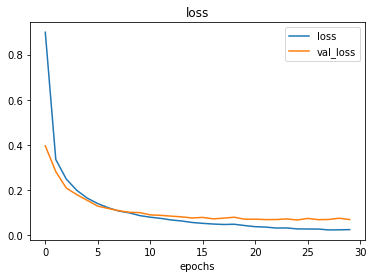

In [0]:
# 損失を可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs');

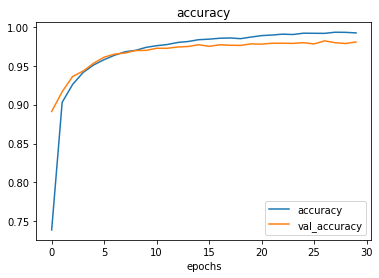

In [0]:
# 正解率を可視化
results[['accuracy', 'val_accuracy']].plot(title='accuracy')
plt.xlabel('epochs');

In [0]:
# 推論に使用するデータを切り出し + バッチサイズの追加
x_sample = np.array([x_train[0]])
x_sample.shape

(1, 28, 28, 1)

In [0]:
model.layers

In [0]:
model.layers[0].get_weights()

[array([[[[-0.84488386, -0.78682405,  0.3409722 ]],
 
         [[ 0.31043872, -0.3106095 ,  0.5580692 ]],
 
         [[ 0.5088628 ,  0.5876247 ,  0.25761303]]],
 
 
        [[[-0.8893243 , -0.3332421 ,  0.36843425]],
 
         [[-0.13764738,  0.08076054,  0.2643006 ]],
 
         [[ 0.6563816 ,  0.6224127 ,  0.29160234]]],
 
 
        [[[-0.1435655 , -0.25083005, -0.3282569 ]],
 
         [[-0.8276589 ,  0.54285634,  0.29384542]],
 
         [[ 0.3765076 ,  0.07527541,  0.3940035 ]]]], dtype=float32),
 array([ 0.08624581,  0.00510489, -0.01487345], dtype=float32)]

In [0]:
output = model.layers[0](x_sample) # convolution 層の計算
output = output[0].numpy() # NumPy の ndarray オブジェクトに変換

In [0]:
output.shape

(26, 26, 3)

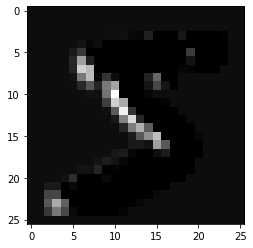

In [0]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], cmap='gray');

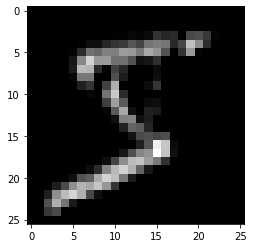

In [0]:
# 2 つ目の出力
plt.imshow(output[:, :, 1], cmap='gray');

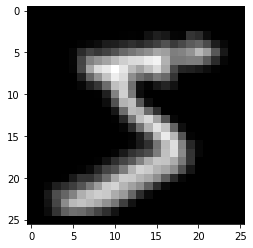

In [0]:
# 3 つ目の出力
plt.imshow(output[:, :, 2], cmap='gray');

In [0]:
output = model.layers[0](x_sample) # convolution 層の計算
output = model.layers[1](output) # pooling 層の計算（サイズを 1/2 に変換）
output = output[0].numpy()

In [0]:
output.shape

(13, 13, 3)

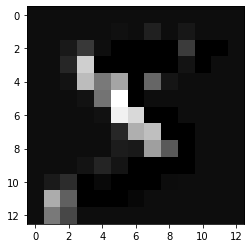

In [0]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], cmap='gray');

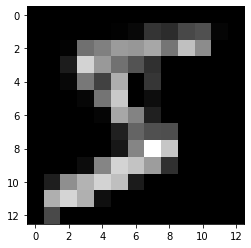

In [0]:
# 2 つ目の出力
plt.imshow(output[:, :, 1], cmap='gray');

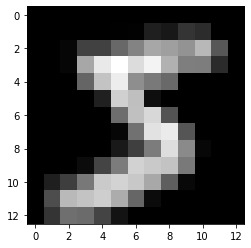

In [0]:
# 3 つ目の出力
plt.imshow(output[:, :, 2], cmap='gray');

In [0]:
output = model.layers[0](x_sample) # convolution 層の計算
output = model.layers[1](output) # pooling 層の計算（サイズを 1/2 に変換）
output = model.layers[2](output) # ベクトル化
output = output[0].numpy()

In [0]:
output.shape

(507,)